In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

plt.style.use('bmh')

In [2]:
data = pd.read_csv('../ts_data/example_wp_log_R.csv', parse_dates=['ds'])
data 

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [3]:
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

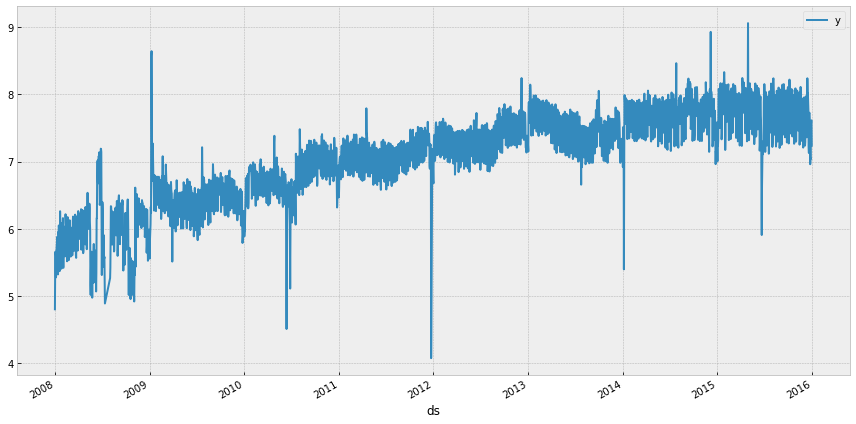

In [4]:
data.plot('ds', 'y', figsize=(12,6))
plt.tight_layout()
plt.show()

## cap saturation

In [5]:
# cap forecast at 8.5
# must be in every row but doesn't have to be constant
data['cap'] = 8.5 
m = Prophet(growth='logistic')
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.9808
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9006.79     0.0219808       728.325           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9014.48    0.00216723       469.515      0.4334           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       9016.92   0.000113255       106.521   6.234e-07       0.001      379  LS failed, Hessian reset 
     296       9017.08   0.000327407       101.312   4.908e-06       0.001      434  LS failed, Hessian reset 
     299       9017.09   0.000133463       64.9736           1           1      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388       9019.63   0.000120178       118.016   1.129e-06       0.001      593  LS failed, Hessian rese

     72.6653      0.6797      0.6797      606   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     424       9019.67   7.73873e-05       65.9356   9.585e-07       0.001      672  LS failed, Hessian reset 
     444       9019.67    8.4947e-07       45.9947      0.4171           1      699   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [6]:
# forecast 5-year
future = m.make_future_dataframe(1826) # include history
future['cap'] = 8.5 # cap forecast at 8.5

In [7]:
future

,ds,cap
0,2008-01-01,8.5
1,2008-01-02,8.5
2,2008-01-03,8.5
3,2008-01-04,8.5
4,2008-01-05,8.5
...,...,...
4684,2020-12-26,8.5
4685,2020-12-27,8.5
4686,2020-12-28,8.5
4687,2020-12-29,8.5


In [8]:
forecast = m.predict(future)
forecast.shape

(4689, 20)

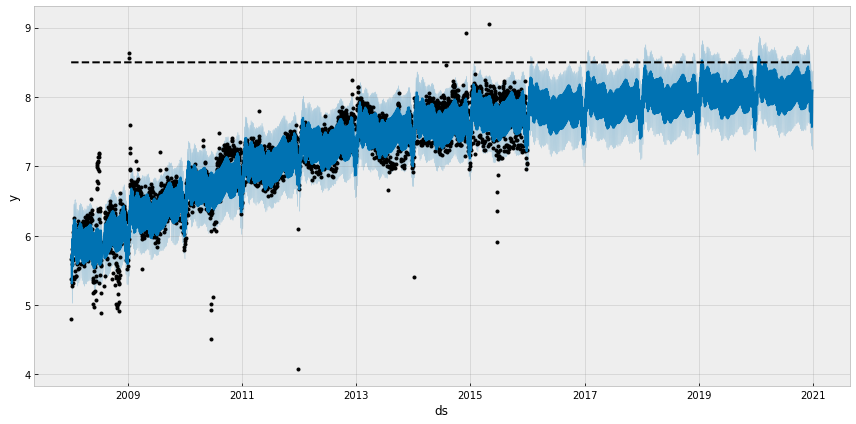

In [9]:
m.plot(forecast, figsize=(12,6))
plt.tight_layout()
plt.show()

## floor saturation

In [10]:
# To use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified.

data['y'] = 10 - data['y']
data['cap'] = 6
data['floor'] = 1.5
data 

,ds,y,cap,floor
0,2008-01-30,4.023649,6,1.5
1,2008-01-16,3.950267,6,1.5
2,2008-01-17,3.988733,6,1.5
3,2008-01-14,4.046757,6,1.5
4,2008-01-15,4.089203,6,1.5
...,...,...,...,...
2858,2015-12-11,2.165212,6,1.5
2859,2015-12-12,2.639896,6,1.5
2860,2015-12-13,2.520136,6,1.5
2861,2015-12-18,2.234855,6,1.5


In [11]:
m = Prophet(growth='logistic')
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -109.241


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6944.3    0.00405112       121.301           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       6944.44   0.000482386       113.787   5.077e-06       0.001      163  LS failed, Hessian reset 
     166       6948.47   0.000375488       84.0941   5.151e-06       0.001      273  LS failed, Hessian reset 
     199       6949.13    0.00335097       112.824           1           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6950.3   8.43275e-05        50.831      0.4313      0.4313      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       6950.41    0.00106159       83.3618   1.336e-05       0.001      505  LS failed, Hessian reset 
     399       6950.87    0.00635608  

In [12]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 6
future['floor'] = 1.5

In [13]:
forecast = m.predict(future)

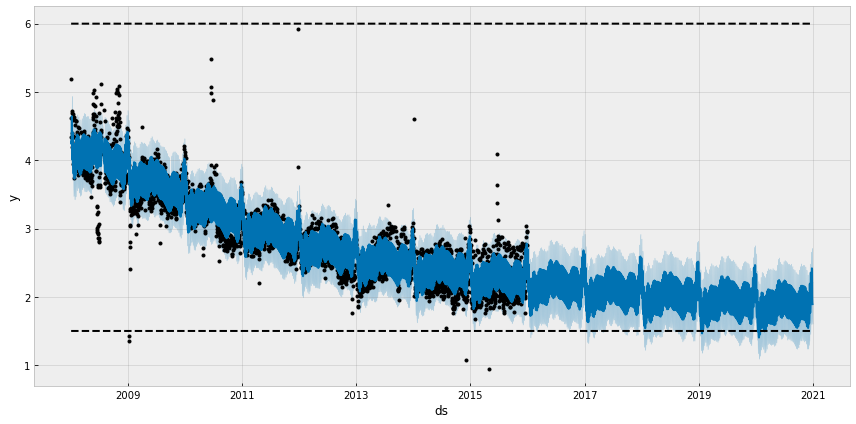

In [14]:
m.plot(forecast, figsize=(12,6))
plt.tight_layout()
plt.show()